<a href="https://colab.research.google.com/github/naimishaawasthi14/naimisha/blob/main/Welcome_To_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
# Import necessary libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFECV
from sklearn.model_selection import train_test_split

# Load your malware dataset
malware_dataset_path = 'malwarebenign.csv'
malware_data = pd.read_csv('malwarebenign.csv', dtype={'column_92': str}, low_memory=False)

# Assuming 'df' is your DataFrame
malware_data.replace('?', 0, inplace=True)  # Replace '?' with 0

# Separate features (X) and target (y)
X = malware_data.drop('class', axis=1)  # Replace 'target_column_name' with the actual target column name
y = malware_data['class']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Decision Tree Classifier
dt_classifier = DecisionTreeClassifier()

# Create RFECV object
rfe = RFECV(estimator=dt_classifier, cv=5)

# Drop rows with NaN values
X_train_no_nan = X_train.dropna()
y_train_no_nan = y_train.loc[X_train_no_nan.index]

# Fit RFECV
rfe.fit(X_train_no_nan, y_train_no_nan )

# Print the selected features
selected_features = X.columns[rfe.support_]
print("Selected Features:", selected_features)

# Fit the model with the selected features
dt_classifier.fit(X_train[selected_features], y_train)

# Evaluate the model
accuracy = dt_classifier.score(X_test[selected_features], y_test)
print("Accuracy with selected features:", accuracy)


Selected Features: Index(['transact', 'attachInterface', 'ServiceConnection', 'android.os.Binder',
       'SEND_SMS', 'Ljava.lang.Class.getCanonicalName',
       'Ljava.lang.Class.getMethods', 'Ljava.net.URLDecoder',
       'READ_PHONE_STATE', 'ClassLoader',
       'Landroid.content.Context.registerReceiver',
       'Landroid.content.Context.unregisterReceiver', 'GET_ACCOUNTS',
       'Ljava.lang.Class.getDeclaredField', 'READ_SMS',
       'Ljavax.crypto.spec.SecretKeySpec',
       'android.intent.action.BOOT_COMPLETED', 'MANAGE_ACCOUNTS',
       'android.content.pm.PackageInfo', 'HttpGet.init',
       'Ljava.lang.Class.getMethod', 'System.loadLibrary',
       'android.intent.action.SEND', 'android.telephony.gsm.SmsManager',
       'WRITE_HISTORY_BOOKMARKS', 'TelephonyManager.getSubscriberId', 'CAMERA',
       'Ljava.lang.Object.getClass', 'Ljava.lang.Class.forName', 'INTERNET',
       'android.intent.action.PACKAGE_REPLACED', 'Binder',
       'android.intent.action.SEND_MULTIPLE', 'cr

In [12]:
# Import necessary libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFECV
from sklearn.model_selection import train_test_split

# Load your malware dataset
malware_dataset_path = 'malwarebenign.csv'
malware_data = pd.read_csv('malwarebenign.csv', dtype={'column_92': str}, low_memory=False)

# Assuming 'df' is your DataFrame
malware_data.replace('?', 0, inplace=True)  # Replace '?' with 0

# Separate features (X) and target (y)
X = malware_data.drop('class', axis=1)  # Replace 'target_column_name' with the actual target column name
y = malware_data['class']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Decision Tree Classifier
dt_classifier = DecisionTreeClassifier()

# Create RFECV object
rfe = RFECV(estimator=dt_classifier, cv=5)

# Drop rows with NaN values
X_train_no_nan = X_train.dropna()
y_train_no_nan = y_train.loc[X_train_no_nan.index]

# Fit RFECV
rfe.fit(X_train_no_nan, y_train_no_nan)

# Print the number of selected features
num_selected_features = rfe.n_features_
print("Number of selected features:", num_selected_features)

# Print the selected features
selected_features = X.columns[rfe.support_]
print("Selected Features:", selected_features)

# Define classifiers
classifiers = {
    'SVM': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'k-NN': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Naive Bayes': GaussianNB(),
    'Logistic Regression': LogisticRegression()
}

# Train and evaluate classifiers with selected features
for clf_name, clf in classifiers.items():
    clf.fit(X_train[selected_features], y_train)
    accuracy = clf.score(X_test[selected_features], y_test)
    print(f"{clf_name} accuracy with selected features: {accuracy}")


Number of selected features: 50
Selected Features: Index(['transact', 'ServiceConnection', 'android.os.Binder', 'SEND_SMS',
       'Ljava.lang.Class.getCanonicalName', 'Ljava.net.URLDecoder',
       'READ_PHONE_STATE', 'ClassLoader',
       'Landroid.content.Context.registerReceiver', 'GET_ACCOUNTS',
       'Ljava.lang.Class.getDeclaredField', 'READ_SMS',
       'Ljavax.crypto.spec.SecretKeySpec',
       'android.intent.action.BOOT_COMPLETED', 'MANAGE_ACCOUNTS',
       'android.content.pm.PackageInfo', 'HttpGet.init',
       'Ljava.lang.Class.getMethod', 'android.telephony.gsm.SmsManager',
       'WRITE_HISTORY_BOOKMARKS', 'TelephonyManager.getSubscriberId', 'CAMERA',
       'Ljava.lang.Object.getClass', 'INTERNET',
       'android.intent.action.PACKAGE_REPLACED',
       'android.intent.action.SEND_MULTIPLE', 'ACCESS_LOCATION_EXTRA_COMMANDS',
       'android.intent.action.TIME_SET', 'TelephonyManager.getDeviceId',
       'MODIFY_AUDIO_SETTINGS', 'WAKE_LOCK', 'RESTART_PACKAGES',
       

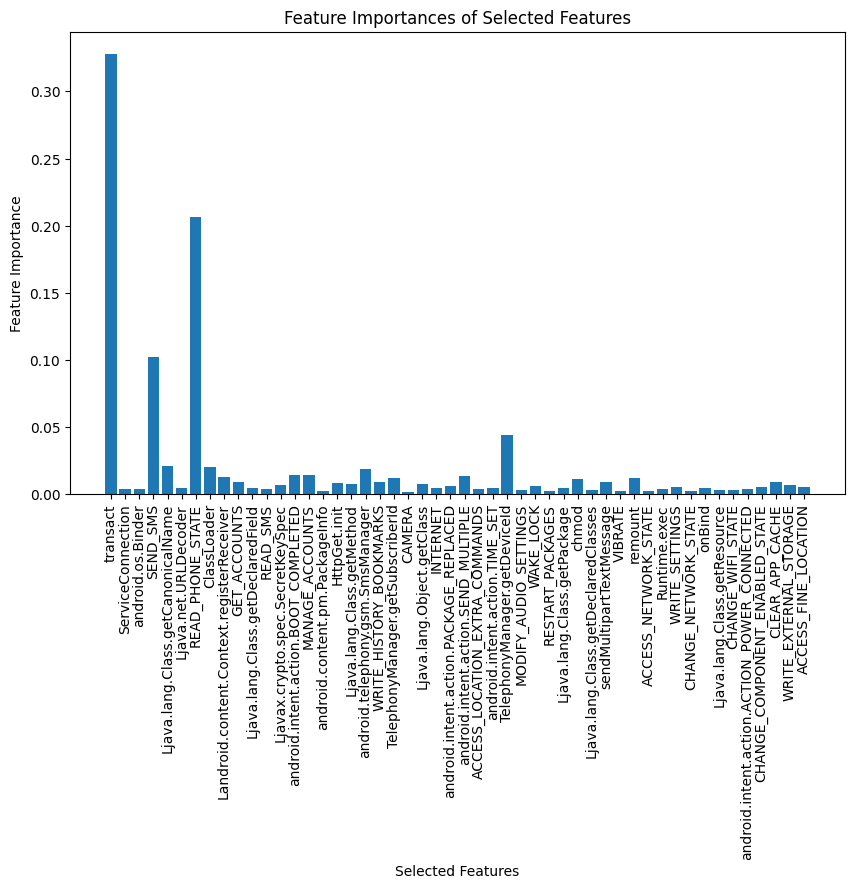

In [21]:
import matplotlib.pyplot as plt

# Get feature importances from RFECV
feature_importances = rfe.estimator_.feature_importances_

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(range(len(selected_features)), feature_importances, align='center')
plt.xticks(range(len(selected_features)), selected_features, rotation=90)
plt.xlabel('Selected Features')
plt.ylabel('Feature Importance')
plt.title('Feature Importances of Selected Features')
plt.show()


In [13]:
from sklearn.metrics import confusion_matrix, classification_report

# Train and evaluate classifiers with selected features
for clf_name, clf in classifiers.items():
    clf.fit(X_train[selected_features], y_train)
    y_pred = clf.predict(X_test[selected_features])

    # Calculate confusion matrix and classification report
    cm = confusion_matrix(y_test, y_pred)
    cr = classification_report(y_test, y_pred)

    # Display results
    print(f"{clf_name} confusion matrix:\n{cm}")
    print(f"{clf_name} classification report:\n{cr}")

SVM confusion matrix:
[[1843   20]
 [  46 1099]]
SVM classification report:
              precision    recall  f1-score   support

           B       0.98      0.99      0.98      1863
           S       0.98      0.96      0.97      1145

    accuracy                           0.98      3008
   macro avg       0.98      0.97      0.98      3008
weighted avg       0.98      0.98      0.98      3008

Decision Tree confusion matrix:
[[1825   38]
 [  36 1109]]
Decision Tree classification report:
              precision    recall  f1-score   support

           B       0.98      0.98      0.98      1863
           S       0.97      0.97      0.97      1145

    accuracy                           0.98      3008
   macro avg       0.97      0.97      0.97      3008
weighted avg       0.98      0.98      0.98      3008

k-NN confusion matrix:
[[1831   32]
 [  36 1109]]
k-NN classification report:
              precision    recall  f1-score   support

           B       0.98      0.98      0.

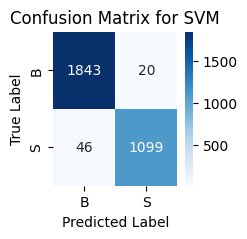

SVM Accuracy: 0.9781


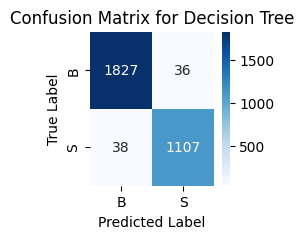

Decision Tree Accuracy: 0.9754


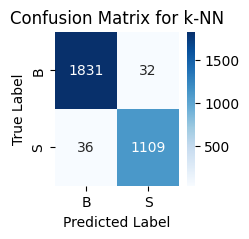

k-NN Accuracy: 0.9774


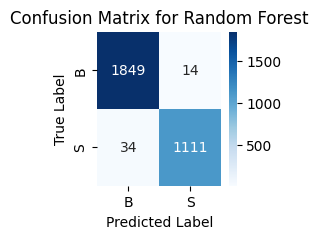

Random Forest Accuracy: 0.9840


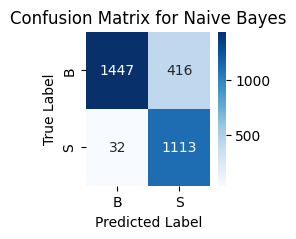

Naive Bayes Accuracy: 0.8511


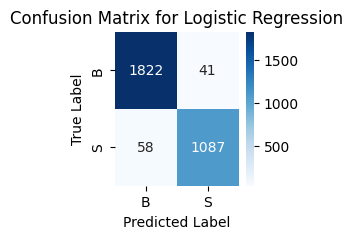

Logistic Regression Accuracy: 0.9671


In [20]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Train and evaluate each classifier
for clf_name, clf in classifiers.items():
    clf.fit(X_train[selected_features], y_train)
    y_pred = clf.predict(X_test[selected_features])

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Plot confusion matrix
    plt.figure(figsize=(2, 2))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=clf.classes_, yticklabels=clf.classes_)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Confusion Matrix for {clf_name}')
    plt.show()

    # Accuracy
    accuracy = clf.score(X_test[selected_features], y_test)
    print(f"{clf_name} Accuracy: {accuracy:.4f}")